In [65]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
data = pd.read_csv('s.csv')

In [67]:
data = data.loc[:, (data != data.iloc[0]).any()]

In [68]:
conlum_list = data.columns.tolist() #分离特征和目标值
conlum_list.remove('version')
features = data[conlum_list] #特征
target = data['version'] # 什么版本

In [69]:
rf_classifier = RandomForestClassifier(n_estimators=100,criterion='gini',)

In [70]:
# 训练模型
rf_classifier.fit(features, target)

RandomForestClassifier()

In [71]:
# 在测试集上进行预测
y_pred = rf_classifier.predict(features)
(y_pred==target).mean()
# 显示混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[6, 0, 0, 0, 0, 0, 0, 0],
       [2, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 1, 1]], dtype=int64)

[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.33 0.67 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.5  0.5 ]]


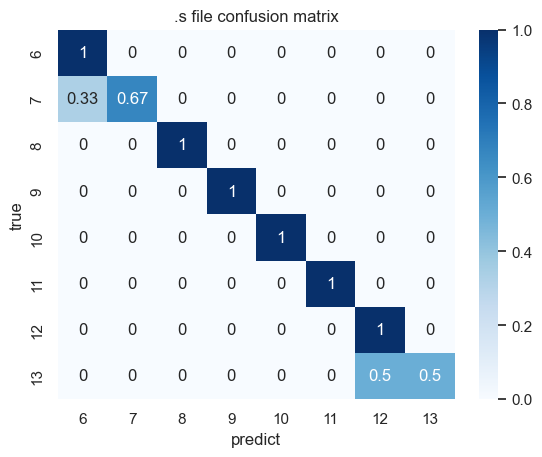

In [72]:
def plot(matrix):
  sns.set()
  f,ax=plt.subplots()
  print(matrix) #打印出来看看
  sns.heatmap(matrix,annot=True,cmap="Blues",ax=ax) #画热力图
  ax.set_title('.s file confusion matrix') #标题
  ax.set_xticklabels(['6','7','8','9','10','11','12','13'])
  ax.set_yticklabels(['6','7','8','9','10','11','12','13'])
  ax.set_xlabel('predict') #x轴
  ax.set_ylabel('true') #y轴

matrix=confusion_matrix(target, y_pred)
matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]  
con_mat_norm = np.around(matrix, decimals=2)
plot(con_mat_norm)# 画比例数据

In [73]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

In [74]:
accuracy = accuracy_score(target, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.91


In [75]:
print('Classification Report:\n', classification_report(target, y_pred))


Classification Report:
               precision    recall  f1-score   support

           6       0.75      1.00      0.86         6
           7       1.00      0.67      0.80         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       0.80      1.00      0.89         4
          13       1.00      0.50      0.67         2

    accuracy                           0.91        34
   macro avg       0.94      0.90      0.90        34
weighted avg       0.93      0.91      0.91        34

